## Aplicacao SVM para Detecçao de Fraude

Autor: SIlvania ALmeida
Dados : Kaggle 


In [1]:
#Importando as bibliotecas

import pandas as pd 
import numpy as np

# Bibliotecas Scikit-learn
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

## Matplotlib - Biblioteca
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Importacao do Seaborn para Graficos- Visualização
import seaborn as sns

%matplotlib inline

## Importar os dados

In [2]:
data = pd.read_csv('dados/creditcard.csv') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame

## Entendendo os dados

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

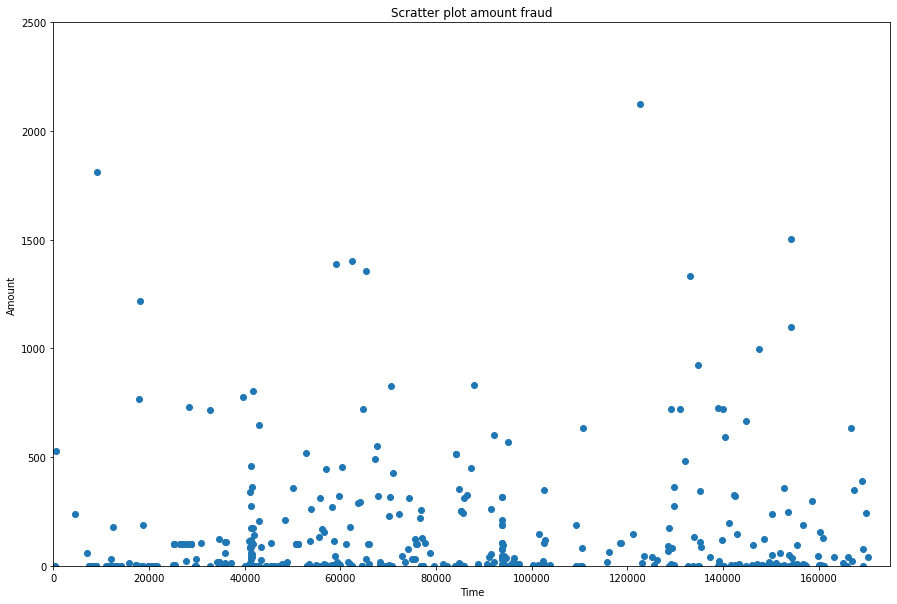

In [7]:
## Entendendo as ocorrencias classificadas como Fraude
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [11]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('Foram encontradas '+ str(nb_big_fraud) + ' classificados como fraude onde a variavel amount era maior  1000  ' + str(df_fraud.shape[0]) + ' frauds')

Foram encontradas 9 classificados como fraude onde a variavel amount era maior  1000  492 frauds


## Avaliando o balanceamento das classes

In [12]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('EXistem somente '+ str(number_fraud) + ' fraude no dataset original, quando o total de não fraude apresentados é de ' + str(number_no_fraud))

EXistem somente 492 fraude no dataset original, quando o total de não fraude apresentados é de 284315


In [13]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


## Correlação das features - variaveis preditoras

In [14]:
df_corr = df.corr() # Calcula as correlaçoes dos pares de variaveis com o Metodo Person- Padrao da Funçao

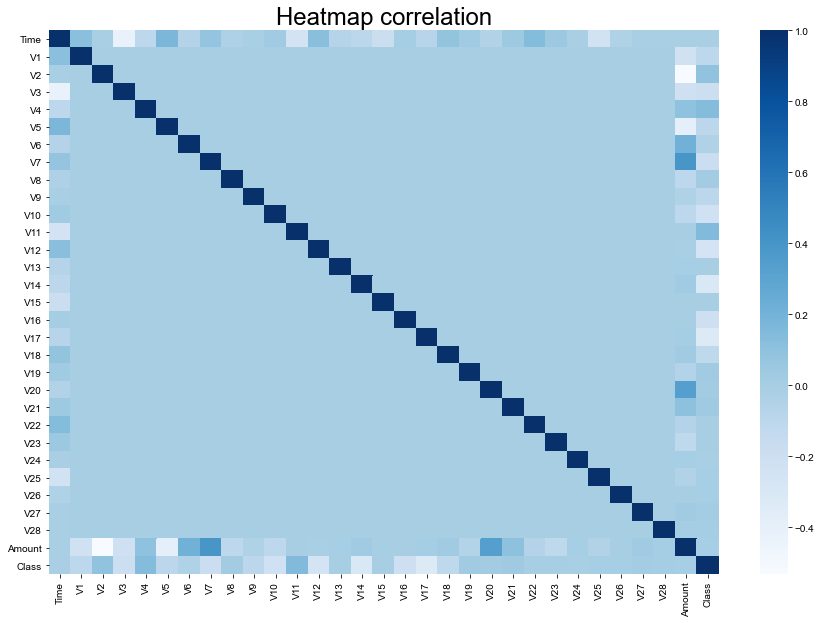

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="Blues") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

Pode observar que há poucos casos de correlaçao e quanto existem são fracos. Isto leva a açao que poderia ser a redução da dimensionalidade . Mas estes dados são foram reduzidos. 

In [18]:
## Criando o Rank de classificaçao

rank = df_corr['Class'] 
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) 
df_rank.dropna(inplace=True) 

## Seleçao dos Dados

In [24]:
#Separacao dos Grupos de treino e teste

# TReino Dataset
df_train_all = df[0:150000]
df_train_1 = df_train_all[df_train_all['Class'] == 1] 
df_train_0 = df_train_all[df_train_all['Class'] == 0]

print('Neste dataset, temos somente ' + str(len(df_train_1)) +" frauds , então vamos extrair uma amostra com o mesmo tamanho de nao fraude")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample)  
df_train = df_train.sample(frac=1) 

Neste dataset, temos somente 293 frauds , então vamos extrair uma amostra com o mesmo tamanho de nao fraude


In [25]:
X_train = df_train.drop(['Time', 'Class'],axis=1) #
y_train = df_train['Class'] 
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [26]:
## Trabalhando com o Dataset total

df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [27]:
X_train_rank = df_train[df_rank.index[1:11]] 
X_train_rank = np.asarray(X_train_rank)

In [28]:
## Com o dataset completo para avaliar se o modelo aprendeu corretamente
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

## Matriz de Confusao

In [29]:
class_names=np.array(['0','1']) 

In [30]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Seleção do Modelo

In [32]:
## SVM

classifier = svm.SVC(kernel='linear') 

In [33]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
## Predicao- Dataset de teste- com o Dataset completo
prediction_SVM_all = classifier.predict(X_test_all)

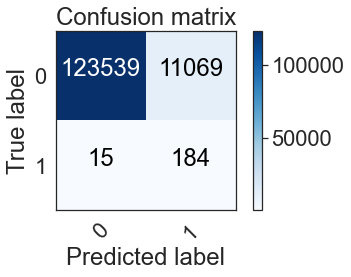

In [35]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [36]:
## Dados para o RANK - Selecao somente das 300 casos- Dataset Balanceado- modelo treinado com todos os casos
classifier.fit(X_train_rank, y_train) 
prediction_SVM = classifier.predict(X_test_all_rank) 

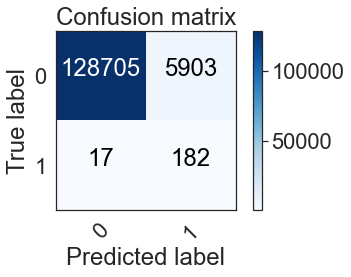

In [37]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [38]:
## Criando um novo classificador para treinar com os dados balanceados- 

classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40}) 

In [39]:
classifier_b.fit(X_train, y_train) 

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [40]:
##Testando o modelo com os dados de testes completos

prediction_SVM_b_all = classifier_b.predict(X_test_all) 

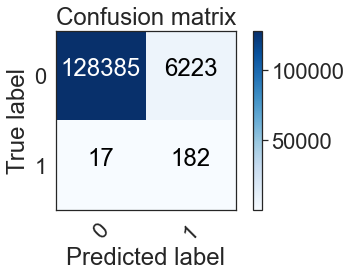

In [41]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [42]:
## Com os dados Rank
classifier_b.fit(X_train_rank, y_train)
prediction_SVM = classifier_b.predict(X_test_all_rank) 


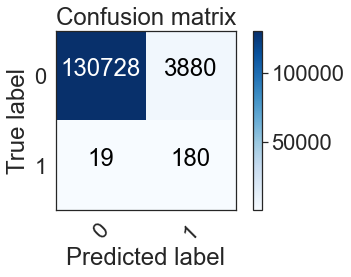

In [43]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)